In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [60]:
train=pd.read_csv("D:\\notes\\udamy\\Python for Data Science and Machine Learning Bootcamp\\notes\\13-Logistic-Regression\\titanic_train.csv")

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


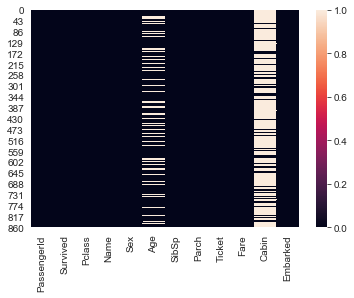

In [62]:
sns.heatmap(train.isnull())

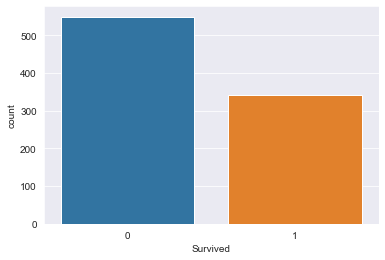

In [63]:
sns.countplot(x='Survived',data=train)

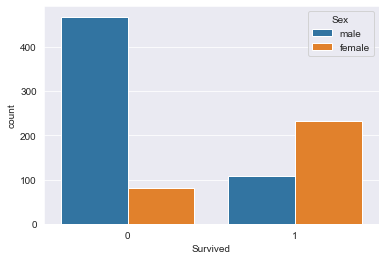

In [64]:
sns.countplot(x='Survived',data=train,hue='Sex')

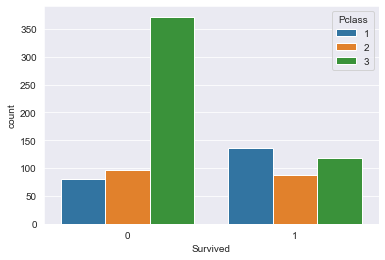

In [65]:
sns.countplot(x='Survived',data=train,hue='Pclass')

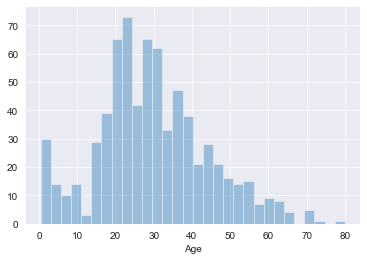

In [66]:
 sns.distplot(train['Age'].dropna(),bins=30,kde=False)

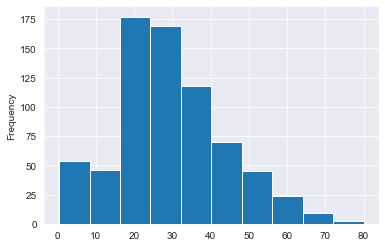

In [67]:
 train['Age'].plot.hist()

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


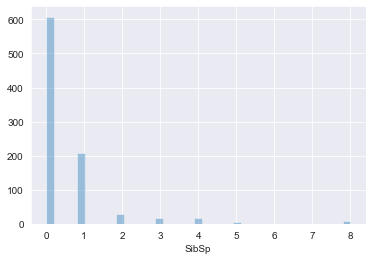

In [69]:
sns.distplot(train['SibSp'],kde=False)

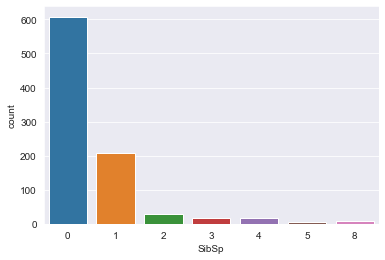

In [70]:
sns.countplot(data=train,x='SibSp')

In [71]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


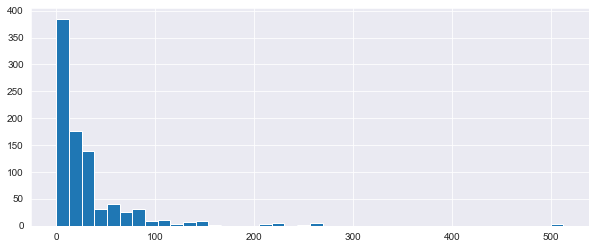

In [72]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [73]:
import cufflinks as cf
cf.go_offline()

In [74]:
train['Fare'].iplot(kind='hist',bins=50)

lacture cleaning data


In [75]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
train['Age'].mean()   

29.69911764705882

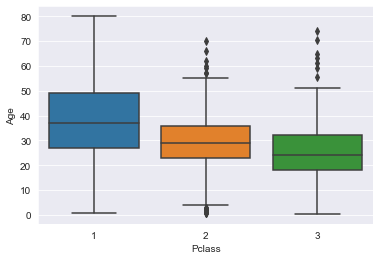

In [77]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [78]:
def image(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
             return 29
        else:
            return 24
    else:
        return Age

In [79]:
train['Age']=train[['Age','Pclass']].apply(image,axis=1)

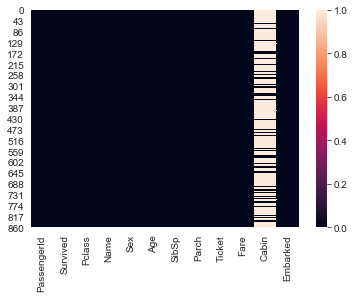

In [80]:
sns.heatmap(train.isnull())

In [81]:
train.drop('Cabin',axis=1,inplace=True)

In [82]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [83]:
train.dropna(inplace=True)

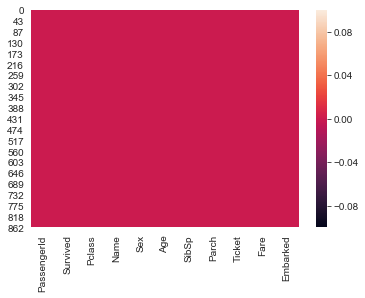

In [84]:
sns.heatmap(train.isnull())

In [85]:
sex=pd.get_dummies(train["Sex"],drop_first=True)

In [86]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [87]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [88]:
train=pd.concat([train,sex,embark],axis=1)

In [89]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [90]:
train.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)

In [91]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,1,0,0


In [92]:
train.drop('PassengerId',axis=1,inplace=True)

In [93]:
train

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,1,0,1
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,23.4500,0,0,1
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,1,0,0


pridection

In [94]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'male',
       'Q', 'S'],
      dtype='object')

In [95]:
x=train.drop('Survived',axis=1)

In [96]:
y=train['Survived']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [115]:

x_test.drop('Name',axis=1,inplace=True)

In [116]:
z

613                                     Horgan, Mr. John
615                                  Herman, Miss. Alice
337                      Burns, Miss. Elizabeth Margaret
718                                  McEvoy, Mr. Michael
152                                     Meo, Mr. Alfonzo
                             ...                        
792                              Sage, Miss. Stella Anna
828                         McCormack, Mr. Thomas Joseph
732                                 Knight, Mr. Robert J
669    Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)
634                                   Skoog, Miss. Mabel
Name: Name, Length: 266, dtype: object

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
logm=LogisticRegression()

In [119]:
logm.fit(x_train,y_train)

C:\Users\sahil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
pre=logm.predict(x_test)

In [121]:
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [123]:
confusion_matrix(y_test,pre)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [124]:
logm.coef_

array([[-0.78495489, -0.0258638 , -0.2165002 , -0.08529262,  0.00468566,
        -2.32107225, -0.01528123, -0.16977451]])

In [125]:
x.columns

Index(['Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [126]:
pd.Series(index=z,data=)

SyntaxError: invalid syntax (<ipython-input-126-fa57038073d7>, line 1)